In [3]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="osmnx_app")

In [4]:
# Thiruvananthapuram Coordinates
tvm_lat, tvm_lon = 8.50606, 76.96153
# Nominatim for reverse geolocator
tvm_osmid = "{lat}, {lon}".format(lat=tvm_lat, lon=tvm_lon)
location = geolocator.reverse(tvm_osmid)
# fetch osm id
location.raw.get('osm_id')

955820326

In [5]:
import osmnx as ox

In [6]:
import networkx as nx

In [7]:
# set multidigraph
G = nx.MultiDiGraph(crs="EPSG:4326")

# add each node based on osmid 
tvm_osmid, kol_osmid, pat_osmid = 955820326,281828280,7351760776
G.add_nodes_from([tvm_osmid, kol_osmid, pat_osmid])

# add coordinates for each node
tvm_lat, tvm_lon = 8.50606, 76.96153
kol_lat, kol_lon = 8.88795, 76.59550
pat_lat, pat_lon = 9.2648, 76.7870
G.nodes[tvm_osmid].update({'osmid': tvm_osmid, 'x': tvm_lon, 'y': tvm_lat})
G.nodes[kol_osmid].update({'osmid': kol_osmid, 'x': kol_lon, 'y': kol_lat})
G.nodes[pat_osmid].update({'osmid': pat_osmid, 'x': pat_lon, 'y': pat_lat})

# add edges 
G.add_edges_from([(tvm_osmid, kol_osmid), (kol_osmid, pat_osmid)])

# add edge bearing
mdigr_bearing = ox.bearing.add_edge_bearings(G, precision=None)
# get added bearing for edges
mdigr_bearing.edges(data="bearing")

OutMultiEdgeDataView([(955820326, 281828280, 316.6), (281828280, 7351760776, 26.6)])

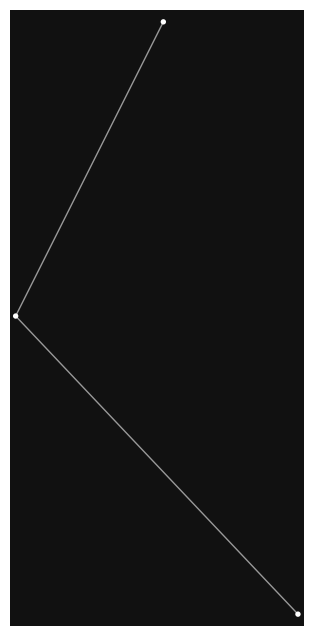

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
# plot bearing
ox.plot_graph(mdigr_bearing)

In [10]:
# convert to geodataframe to plot in map
geodf_edge = ox.utils_graph.graph_to_gdfs(mdigr_bearing, nodes=False, edges=True, node_geometry=False, fill_edge_geometry=True)

In [11]:
# plot in map
geodf_edge.explore()